# Instrucciones (kinda)

El codigo funciona con Python 3.7 pero colab tiene 3.6.9, aun asi es posible conectarse a un kernel local :D 

In [1]:
#!pip install git+https://gitlab.com/psyrax/turnips.git
#Prueba de downgrade [python que no funciono] (tambien podemos intentar hacer nuestro fork o implementacion)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import gspread_pandas
from gspread_pandas import Spread, Client
gSpreadConfig = gspread_pandas.conf.get_config(conf_dir="./", file_name="client_id.json")
import json

In [3]:
spread = Spread('naboHolding',config=gSpreadConfig)
naboDF = spread.sheet_to_df()

In [4]:
naboDF.fillna(0).head()

,Isla,Precio Nabo,Lunes AM,Lunes PM,Martes AM,Martes PM,Miercoles AM,Miercoles PM,Jueves AM,Jueves PM,Viernes AM,Viernes PM,Sabado AM,Sabado PM
Humano,,,,,,,,,,,,,,
Victor,Woakanda,108,143,,123,,,,,,,,,
Selene,luna,102,83,146,,152,,,,,,,,
Psyrax,IslaBonita,101,79,75,71,67,63,,55,,,,,
Ale,PambazoBay,92,48,,,,33,29,,,,,,
Mariana,Hirome,94,83,,165,494,,,,,,,,


In [5]:
archipielagoData = {}
archipielagoData['islands'] = {}
for index,row in naboDF.iterrows():
    archipielagoData['islands'][row['Isla']] = {
      "timeline" : {
          "Sunday_AM" : row['Precio Nabo'],
      }
    }
    if row['Lunes AM']:
        archipielagoData['islands'][row['Isla']]['timeline']['Monday_AM'] = row['Lunes AM']
    if row['Lunes PM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Monday_PM'] = row['Lunes PM']
    if row['Martes AM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Tuesday_AM'] = row['Martes AM']
    if row['Martes PM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Tuesday_PM'] = row['Martes PM']
    if row['Miercoles AM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Wednesday_AM'] = row['Miercoles AM']
    if row['Miercoles PM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Wednesday_PM'] = row['Miercoles PM']
    if row['Jueves AM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Thursday_AM'] = row['Jueves AM']
    if row['Jueves PM']:
        archipielagoData['islands'][row['Isla']
                                    ]['timeline']['Thursday_PM'] = row['Jueves PM']

In [6]:
jsonDataTurnips = json.dumps(archipielagoData)
print(jsonDataTurnips)

{"islands": {"Woakanda": {"timeline": {"Sunday_AM": "108", "Monday_AM": "143", "Tuesday_AM": "123"}}, "luna": {"timeline": {"Sunday_AM": "102", "Monday_AM": "83", "Monday_PM": "146", "Tuesday_PM": "152"}}, "IslaBonita": {"timeline": {"Sunday_AM": "101", "Monday_AM": "79", "Monday_PM": "75", "Tuesday_AM": "71", "Tuesday_PM": "67", "Wednesday_AM": "63", "Thursday_AM": "55"}}, "PambazoBay": {"timeline": {"Sunday_AM": "92", "Monday_AM": "48", "Wednesday_AM": "33", "Wednesday_PM": "29"}}, "Hirome": {"timeline": {"Sunday_AM": "94", "Monday_AM": "83", "Tuesday_AM": "165", "Tuesday_PM": "494"}}, "Sebastovia": {"timeline": {"Sunday_AM": "96", "Monday_AM": "103", "Monday_PM": "113", "Tuesday_AM": "76", "Tuesday_PM": "67", "Wednesday_AM": "61"}}, "Tuli": {"timeline": {"Sunday_AM": "110", "Monday_AM": "150", "Tuesday_AM": "104"}}, "Manduzz": {"timeline": {"Sunday_AM": "110"}}, "Pau Hana": {"timeline": {"Sunday_AM": "103", "Monday_AM": "74", "Monday_PM": "70", "Tuesday_AM": "66", "Tuesday_PM": "63"

In [7]:
from turnips import archipelago
import json
islands = archipelago.Archipelago.load_json(jsonDataTurnips)

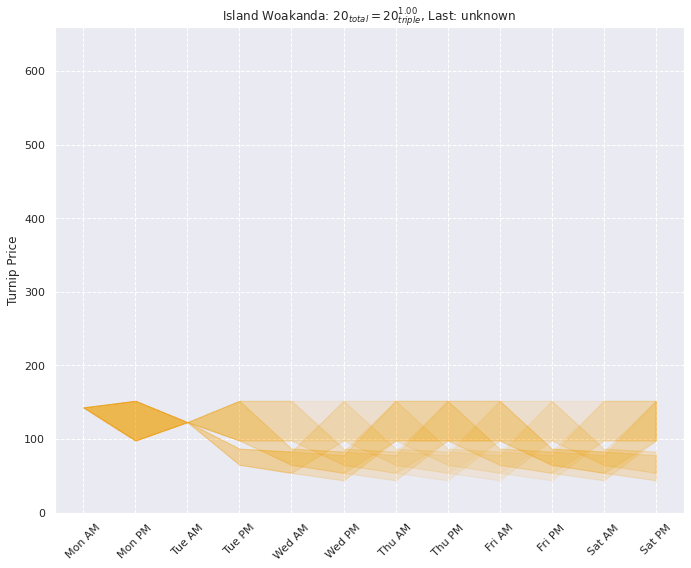

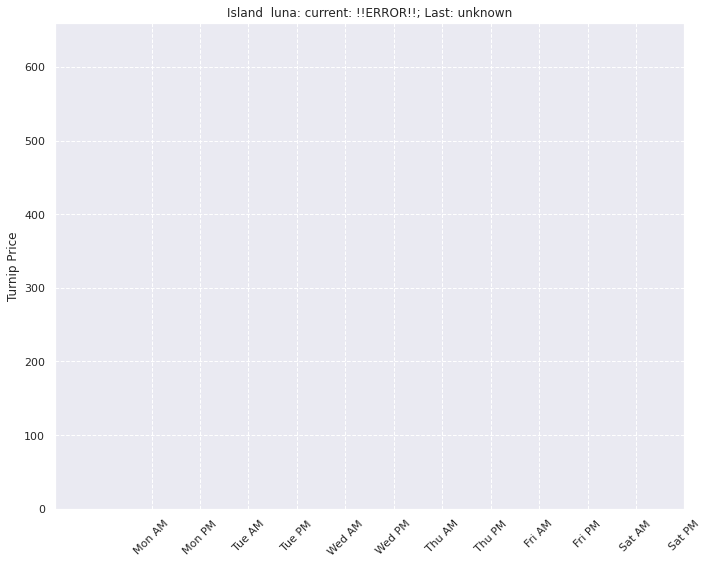

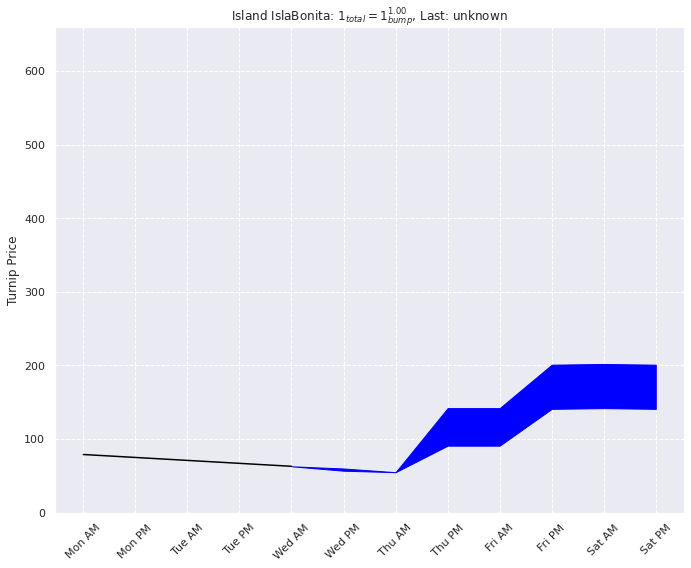

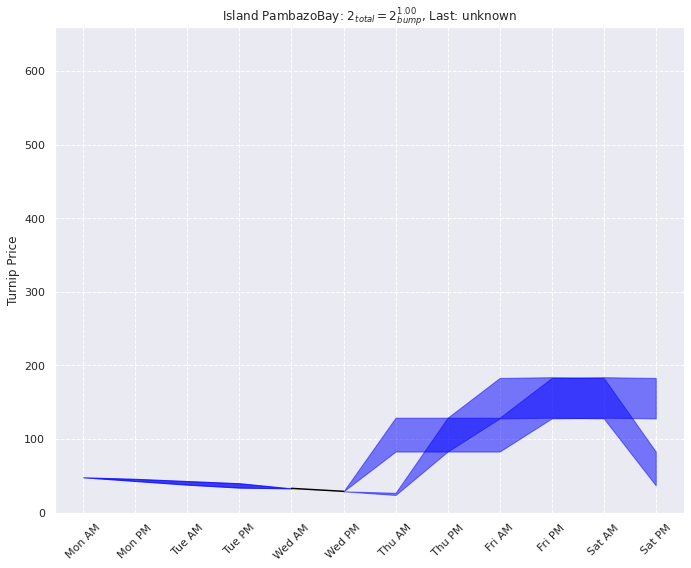

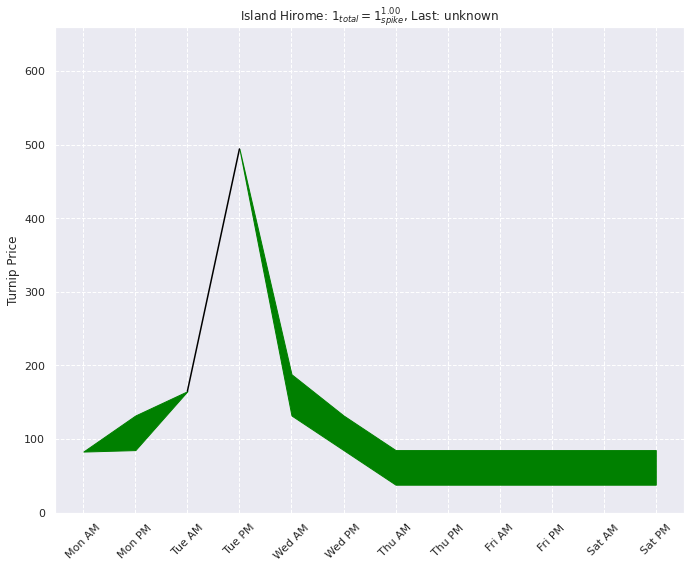

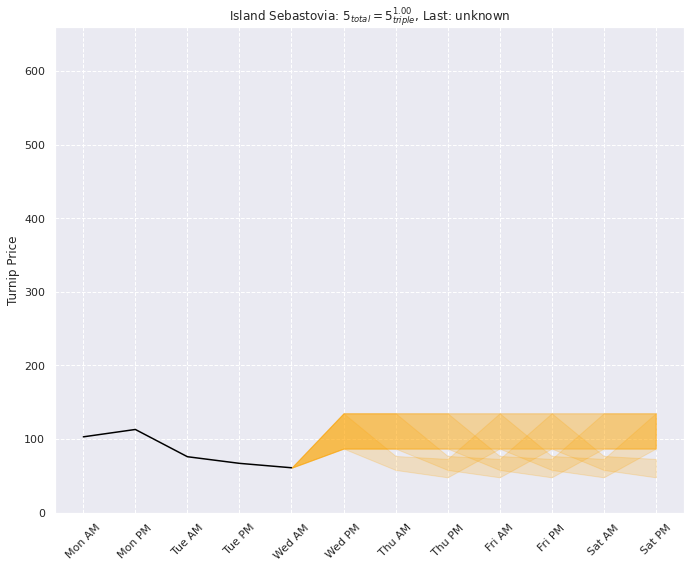

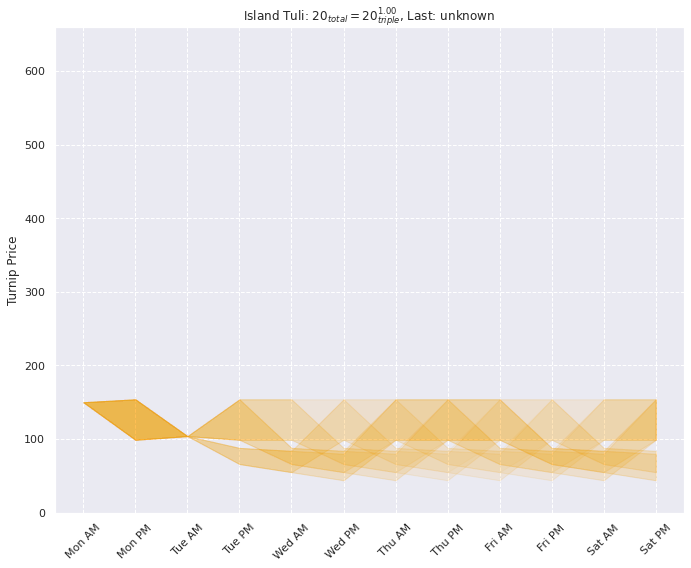

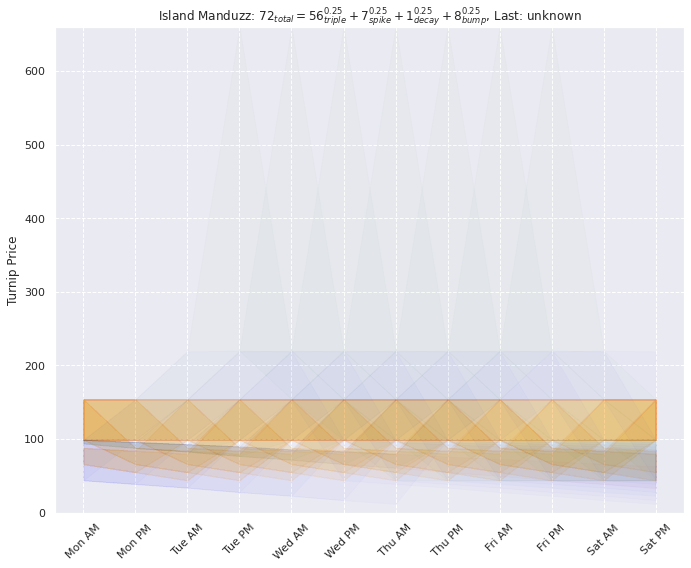

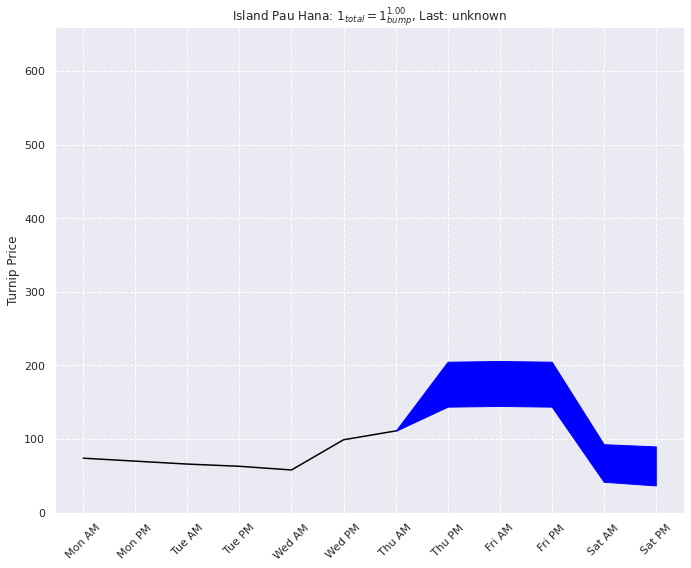

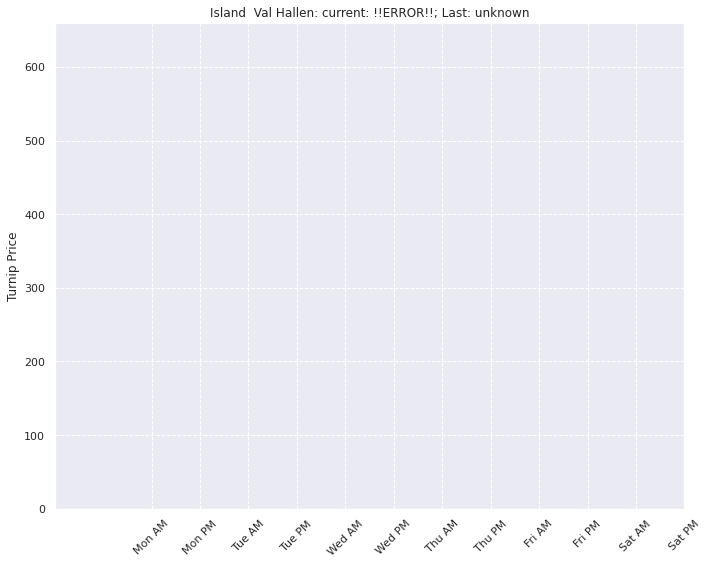

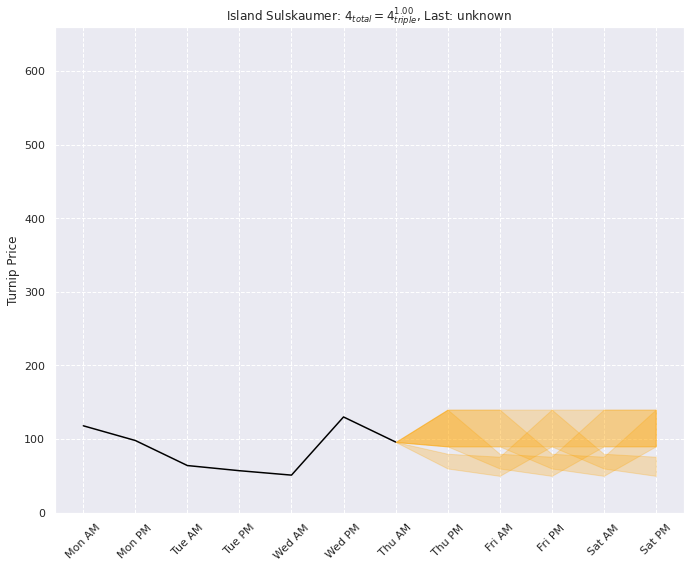

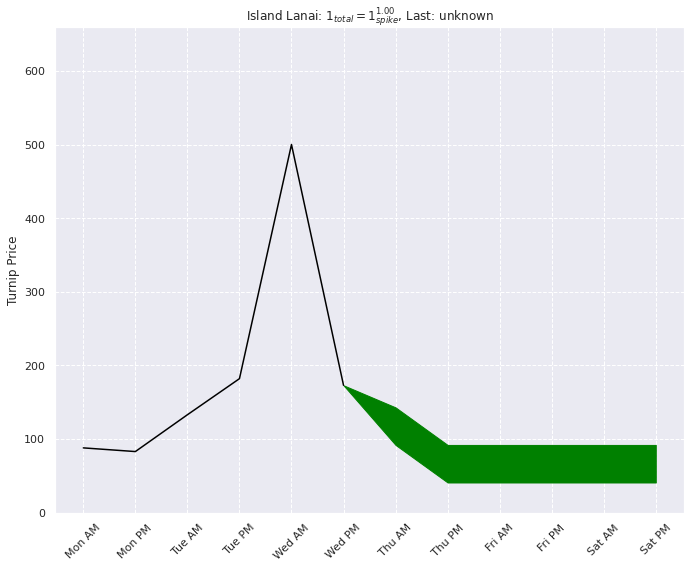

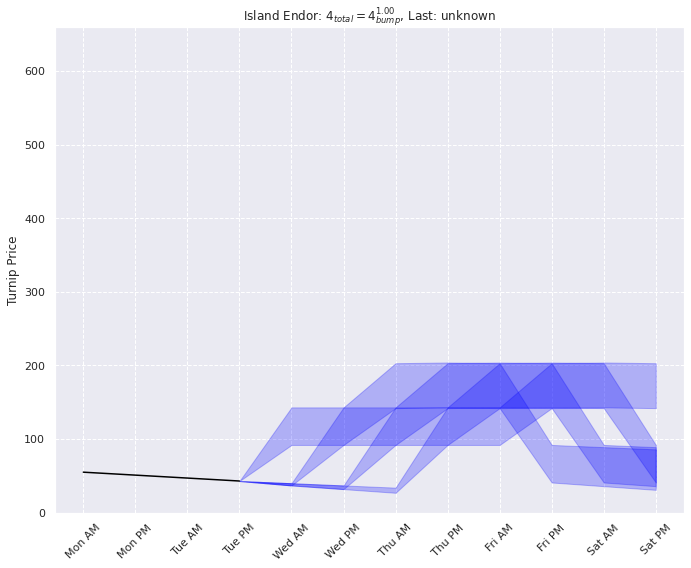

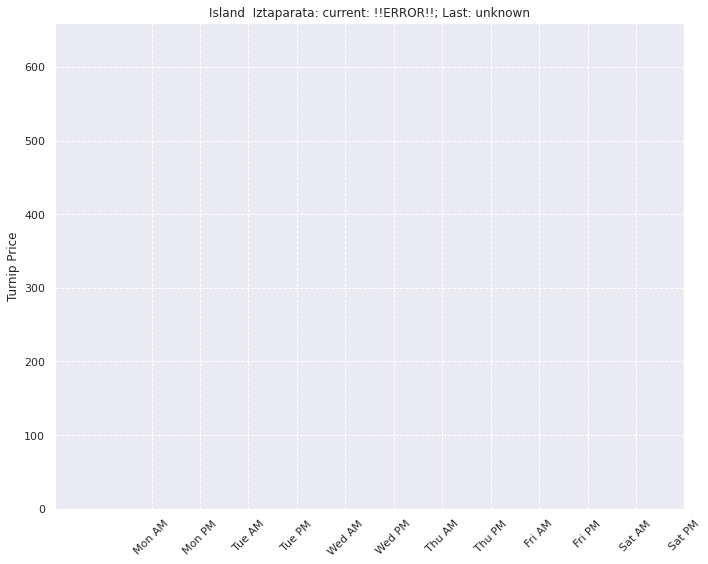

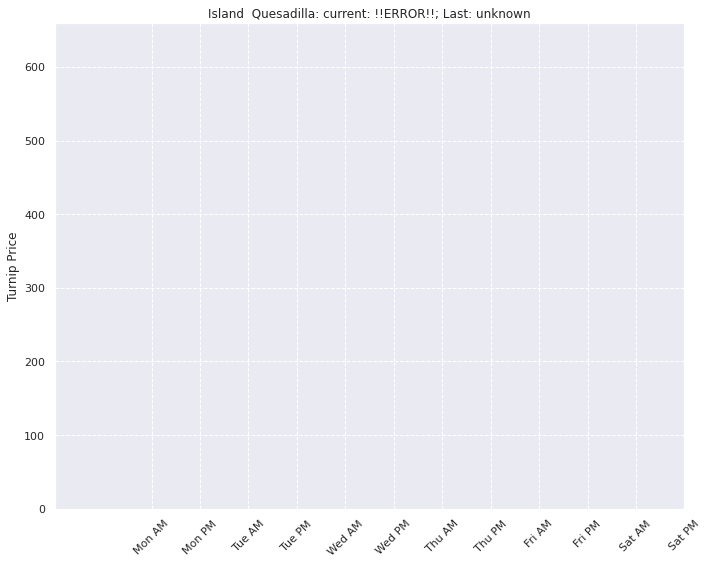

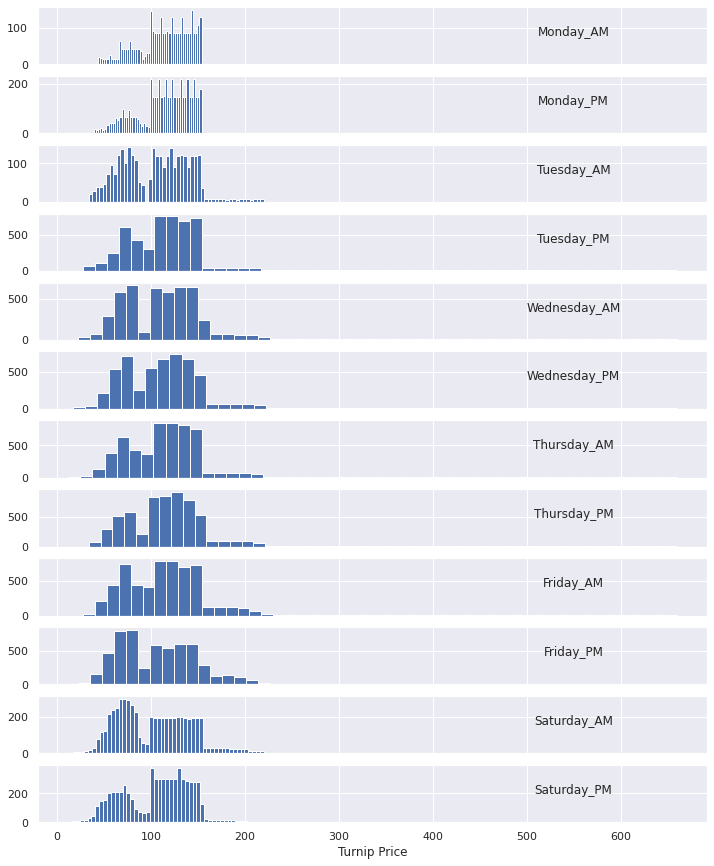

In [8]:
islands.plot()

In [9]:
islands.summary()

Woakanda
--------------------

Triple Model Analyses:
  20 model(s) remaining
  price: 108
  - phase1: 3
    - decay1: 2
      phase2: [1, 4]
    - decay1: 3
      phase2: [1, 4]
  - phase1: 4
    - decay1: 2
      phase2: [1, 3]
    - decay1: 3
      phase2: [1, 3]
  - phase1: 5
    - decay1: 2
      phase2: [1, 2]
    - decay1: 3
      phase2: [1, 2]
  - phase1: 6
    phase2: 1
    decay1: [2, 3]

  Summary: 
    Time          Price                   Likely                  Odds  
    Monday_AM:    143;                    143;                    (100.00%)
    Monday_PM:    [98, 152];              [98, 152];              (100.00%)
    Tuesday_AM:   123;                    123;                    (100.00%)
    Tuesday_PM:   {[65, 87], [98, 152]};  [98, 152];              (78.20%)
    Wednesday_AM: {[54, 87], [98, 152]};  [65, 83];               (37.57%)
    Wednesday_PM: {[44, 87], [98, 152]};  [65, 78];               (26.42%)
    Thursday_AM:  {[44, 87], [98, 152]};  {[65, 78], [98, 1

In [10]:
islandsDFData = {}
archipielagoDFs= []
for island in islands.islands:
    if islandsDFData.get(island.name) is None:
        islandsDFData[island.name] = {}
    islandsDFData[island.name].update(island.model_group.histogram())
    for histogram in islandsDFData[island.name]:
        df = pd.DataFrame.from_dict(islandsDFData[island.name][histogram], orient='index').reset_index().rename(columns={'index':'price', 0:'count'})
        df['selling_time'] = str(histogram)
        df['island'] = island.name
        archipielagoDFs.append(df)

In [11]:
archDf = pd.concat(archipielagoDFs, ignore_index=True)
labels = ['Poco probable','Nada probable','Probable','Muy probable']
archDf['rangoPrecio'] = pd.cut(archDf['count'], 4, labels=labels)
priceCutLabels = ['0-100', '100-200', '200-300', '300-400', '500-600', '600+']
archDf['priceCut'] = pd.cut(archDf['price'], 6, labels=priceCutLabels)
archDf['count'].fillna(0, inplace=True)

In [12]:
spread.df_to_sheet(archDf, index=False, sheet='10May-16MayData', replace=True)

In [13]:
max_probable = archDf[archDf['rangoPrecio'] == "Muy probable"]['price'].max()
print(max_probable)
min_probable  = archDf[archDf['rangoPrecio'] == "Muy probable"]['price'].min()
print(min_probable)

154
99


In [14]:
groupedCounts = archDf.groupby(['rangoPrecio', 'priceCut', 'selling_time'])['count'].sum().reset_index()
groupedCounts['percentage'] = groupedCounts['count'] / groupedCounts['count'].sum()
groupedCounts['count'].fillna(0, inplace=True)
groupedCounts['percentage'].fillna(0, inplace=True)

In [16]:
spread.df_to_sheet(groupedCounts, index=False, sheet='10May-16MayDataGrouped', replace=True)

NameError: name 'groupedCounts' is not defined

In [17]:
groupedCounts[(groupedCounts['rangoPrecio'] == 'Muy probable') | (groupedCounts['rangoPrecio'] == 'Probable')].head(20)

NameError: name 'groupedCounts' is not defined

In [18]:
groupedCounts[(groupedCounts['rangoPrecio'] == 'Nada probable') | (groupedCounts['rangoPrecio'] == 'Poco probable')].head(20)

NameError: name 'groupedCounts' is not defined